In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

pd.set_option('display.max_columns', 500)

In [2]:
spray = pd.read_csv('./spray.csv')
weather = pd.read_csv('./weather.csv')
data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [5]:
weather.tail(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2934,1,2014-10-27,77,51,64,16,51,58,1,0,0618,1653,,0,M,0.0,0.00,28.92,29.66,12.0,19,12.9
2935,2,2014-10-27,79,54,67,M,52,59,0,2,-,-,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
2936,1,2014-10-28,68,45,57,10,38,47,8,0,0619,1651,,0,M,0.0,T,29.15,29.85,14.8,26,15.6
2937,2,2014-10-28,66,48,57,M,40,48,8,0,-,-,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6
2938,1,2014-10-29,49,36,43,-4,32,40,22,0,0620,1650,,0,M,0.0,0.00,29.36,30.06,9.5,29,9.9
2939,2,2014-10-29,49,40,45,M,34,42,20,0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,0622,1649,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,M,35,42,20,0,-,-,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,0623,1647,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9
2943,2,2014-10-31,49,34,42,M,29,36,23,0,-,-,RA SN BR,M,M,M,0.04,29.54,30.20,21.7,34,22.6


In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [7]:
data.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


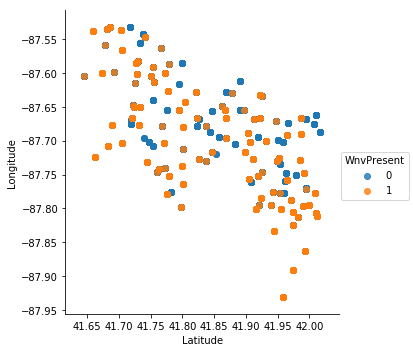

In [9]:
sns.lmplot(x='Latitude', y='Longitude', hue='WnvPresent', data=data, fit_reg=False)
plt.show()

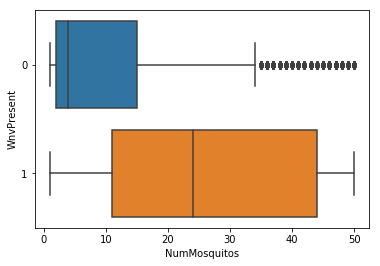

In [10]:
sns.boxplot(x='NumMosquitos', y='WnvPresent', data=data, orient='h')
plt.show()

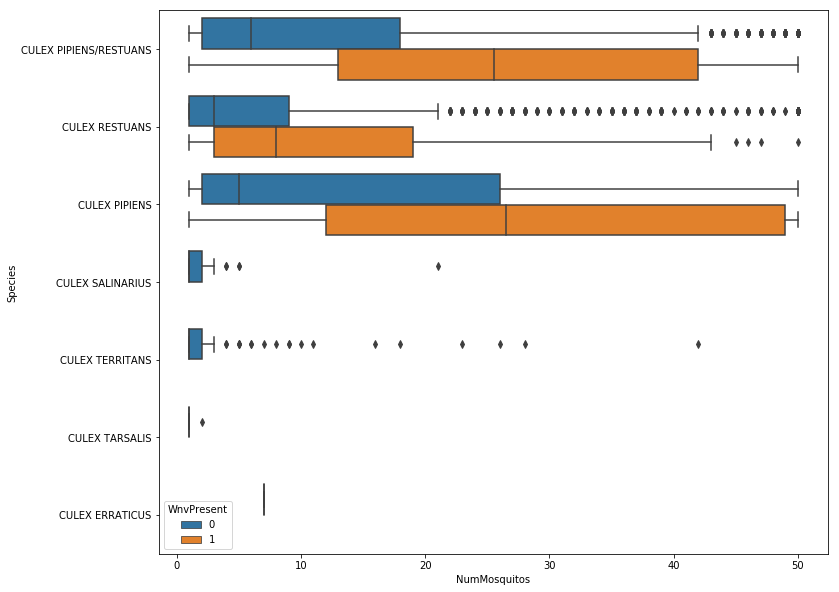

In [11]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='NumMosquitos', y='Species', hue='WnvPresent', data=data, orient='h')
plt.show()

In [12]:
convert_date = lambda dateTime: pd.to_datetime(dateTime, format='%Y-%m-%d', errors='raise', box=True)
data['Day'] = convert_date(data['Date']).apply(lambda v: v.day)
data['Month'] = convert_date(data['Date']).apply(lambda v: v.month)
data['Year'] = convert_date(data['Date']).apply(lambda v: v.year)
data.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Day,Month,Year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007


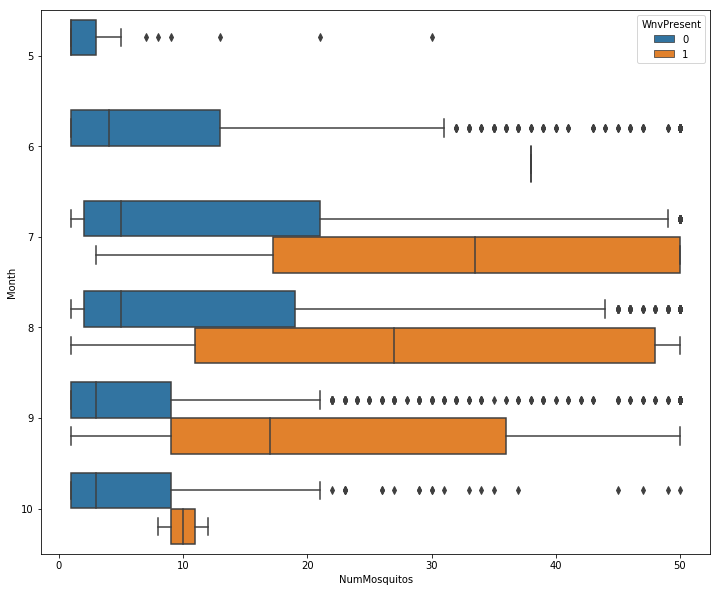

In [13]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='NumMosquitos', y='Month', hue='WnvPresent', data=data, orient='h')
plt.show()

In [14]:
# Replacing 'M' with avg temperature
weather.Tavg = (weather.Tmax + weather.Tmin)/2

#temperature = pd.DataFrame(weather.groupby('Date')['Tavg'].mean()).reset_index()

temperature = weather.groupby('Date')[['Tavg',]].mean()

In [15]:
temperature.shape

(1472, 1)

In [16]:
weather.drop(weather[weather.WetBulb == 'M'].index, inplace = True)

In [17]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,66.5,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,50.5,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,51.5,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [18]:
weather['WetBulb'] = weather['WetBulb'].apply(lambda x: int(x))

In [19]:
weather_clean = weather[['Station', 'Date', 'Tavg', 'WetBulb']].copy()

In [20]:
weather_clean.head()

,Station,Date,Tavg,WetBulb
0,1,2007-05-01,66.5,56
1,2,2007-05-01,68.0,57
2,1,2007-05-02,50.5,47
3,2,2007-05-02,51.5,47
4,1,2007-05-03,56.0,48


In [21]:
# difference between dry and wet bulb
weather_clean['diff'] = weather_clean['Tavg'] - weather_clean['WetBulb']

# 100 - ((350*(dry-wet))/dry)
weather_clean['Humidity'] = 100 - ((350*weather_clean['diff'])/weather_clean['Tavg'])
weather_clean['Humidity'] = weather_clean['Humidity'].apply(lambda x: round(x,2))

/Users/by.tachyon/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


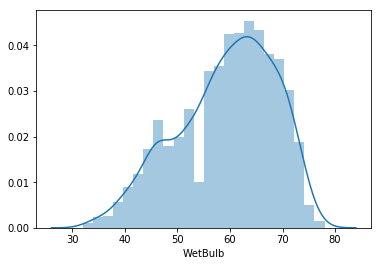

In [22]:
sns.distplot(weather_clean['WetBulb'])
plt.show()

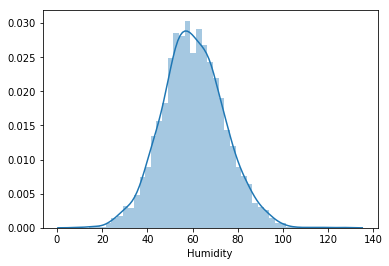

In [23]:
sns.distplot(weather_clean['Humidity'])
plt.show()

In [24]:
temp = weather_clean.groupby('Date')[['Tavg','Humidity']].mean().reset_index()

In [25]:
data_merged = pd.merge(data,temp,on='Date')

In [26]:
data_merged.shape

(10506, 17)

In [27]:
len(data_merged.Street.unique())

128

In [28]:
model1 = pd.get_dummies(data_merged,columns=['Species'],drop_first=True)

In [29]:
model1.head()

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Day,Month,Year,Tavg,Humidity,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007,75.25,54.695,0,1,0,0,0,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007,75.25,54.695,0,0,1,0,0,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007,75.25,54.695,0,0,1,0,0,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007,75.25,54.695,0,1,0,0,0,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007,75.25,54.695,0,0,1,0,0,0


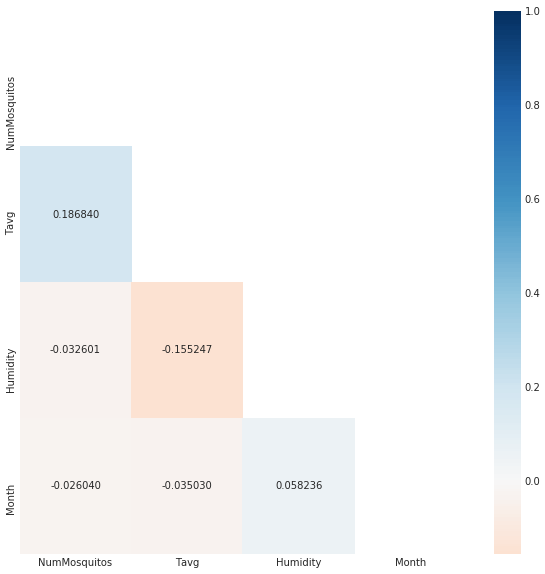

In [30]:
plt.figure(figsize=(10, 10))
corr = model1[['NumMosquitos', 'Tavg', 'Humidity', 'Month']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, center=0, cmap='RdBu', annot=True, fmt='f')
plt.show()

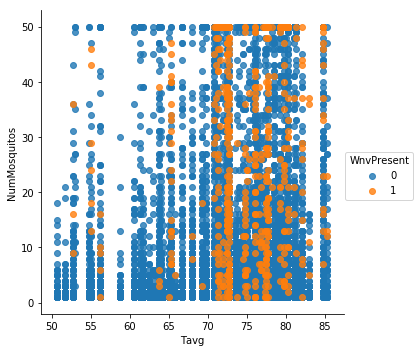

In [31]:
sns.lmplot(x='Tavg', y='NumMosquitos', hue='WnvPresent', data=model1, fit_reg=False)
plt.show()

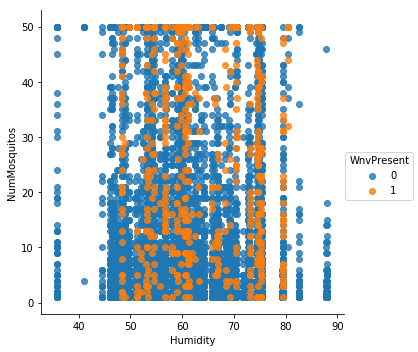

In [32]:
sns.lmplot(x='Humidity', y='NumMosquitos', hue='WnvPresent', data=model1, fit_reg=False)
plt.show()

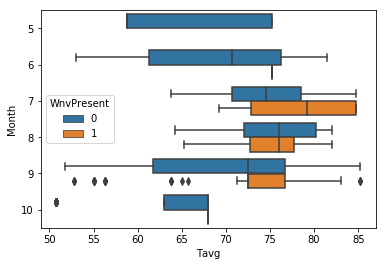

In [33]:
sns.boxplot(x='Tavg', y='Month', hue='WnvPresent', data=model1, orient='h')
plt.show()

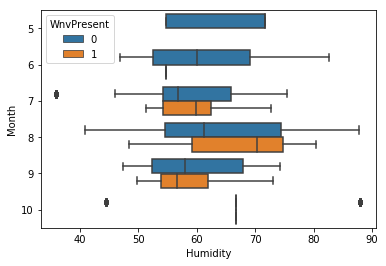

In [34]:
sns.boxplot(x='Humidity', y='Month', hue='WnvPresent', data=model1, orient='h')
plt.show()

In [35]:
model1.columns

Index([u'Date', u'Address', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent', u'Day', u'Month',
       u'Year', u'Tavg', u'Humidity', u'Species_CULEX PIPIENS',
       u'Species_CULEX PIPIENS/RESTUANS', u'Species_CULEX RESTUANS',
       u'Species_CULEX SALINARIUS', u'Species_CULEX TARSALIS',
       u'Species_CULEX TERRITANS'],
      dtype='object')

In [36]:
y = model1.WnvPresent
X = model1[['Tavg','Humidity','Longitude','Latitude','Species_CULEX PIPIENS','Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS']]

In [37]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

Xs = ss.fit_transform(X.values)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [39]:
lr = LogisticRegression()
lr.fit(Xs,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
test.shape

(116293, 11)

In [41]:
tester = pd.merge(test,temp,on='Date')

In [42]:
tester = pd.get_dummies(tester,columns=['Species'],drop_first=True)

In [43]:
tester.shape

(116293, 19)

In [44]:
test_X = tester[['Tavg','Humidity','Longitude','Latitude','Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS']]

In [45]:
test_X.head()

,Tavg,Humidity,Longitude,Latitude,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS
0,74.75,49.75,-87.800991,41.95469,0,1,0
1,74.75,49.75,-87.800991,41.95469,0,0,1
2,74.75,49.75,-87.800991,41.95469,1,0,0
3,74.75,49.75,-87.800991,41.95469,0,0,0
4,74.75,49.75,-87.800991,41.95469,0,0,0


In [46]:
test_Xs = ss.fit_transform(test_X.values)

In [47]:
test_Xs

array([[ 0.45789465, -0.75294401, -1.33004502, ..., -0.37773229,
         2.56352332, -0.37994353],
       [ 0.45789465, -0.75294401, -1.33004502, ..., -0.37773229,
        -0.39008812,  2.63197009],
       [ 0.45789465, -0.75294401, -1.33004502, ...,  2.64737761,
        -0.39008812, -0.37994353],
       ..., 
       [-0.45026166,  1.35454423,  0.74435097, ..., -0.37773229,
        -0.39008812, -0.37994353],
       [-0.45026166,  1.35454423,  0.74435097, ..., -0.37773229,
        -0.39008812, -0.37994353],
       [-0.45026166,  1.35454423,  0.74435097, ..., -0.37773229,
        -0.39008812, -0.37994353]])

In [48]:
results = pd.DataFrame(lr.predict(test_Xs))

In [49]:
results = results.reset_index().rename(columns={'index': 'Id', 0: 'WnvPresent'})

In [50]:
results.shape

(116293, 2)

In [51]:
np.sum(results)

Id            6761972778
WnvPresent          4020
dtype: int64

In [52]:
results.to_csv('boss.csv')